In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

In [2]:
#Plot all the growth curves of OD600 vs Time for the different Strains with the following instructions:

# Getting url and reading in the data(everything will be done in Base R)
url <- "https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/mcgc.tsv"
#You can install readr pakage to use read.delim()
data <- read.table(url, sep = "\t", header = TRUE, stringsAsFactors = FALSE)
print(head(data))


  time    A1    A2    A3    A4    A5    A6    A7    A8    A9   A10   A11   A12
1    0 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
2   15 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
3   30 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
4   45 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
5   60 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.003 0.003
6   75 0.003 0.002 0.003 0.002 0.002 0.003 0.002 0.003 0.003 0.003 0.003 0.003
     B1    B2    B3    B4    B5    B6    B7    B8    B9   B10   B11   B12    C1
1 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
2 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
3 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
4 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
5 0.002 0.002 0.002 0.003 0.003 0.002 0.002 0.0

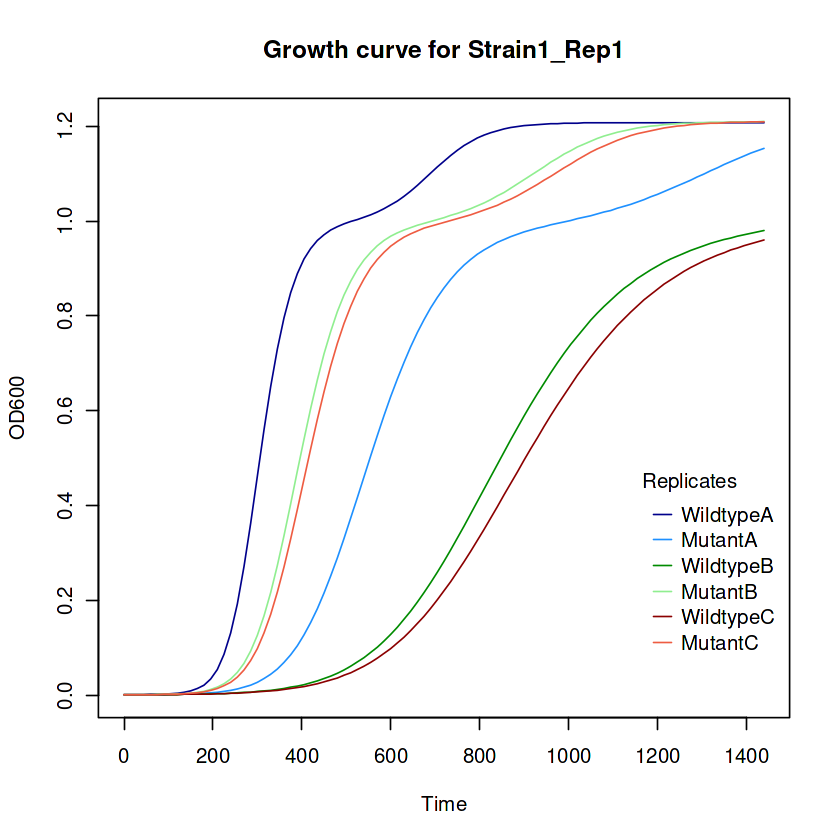

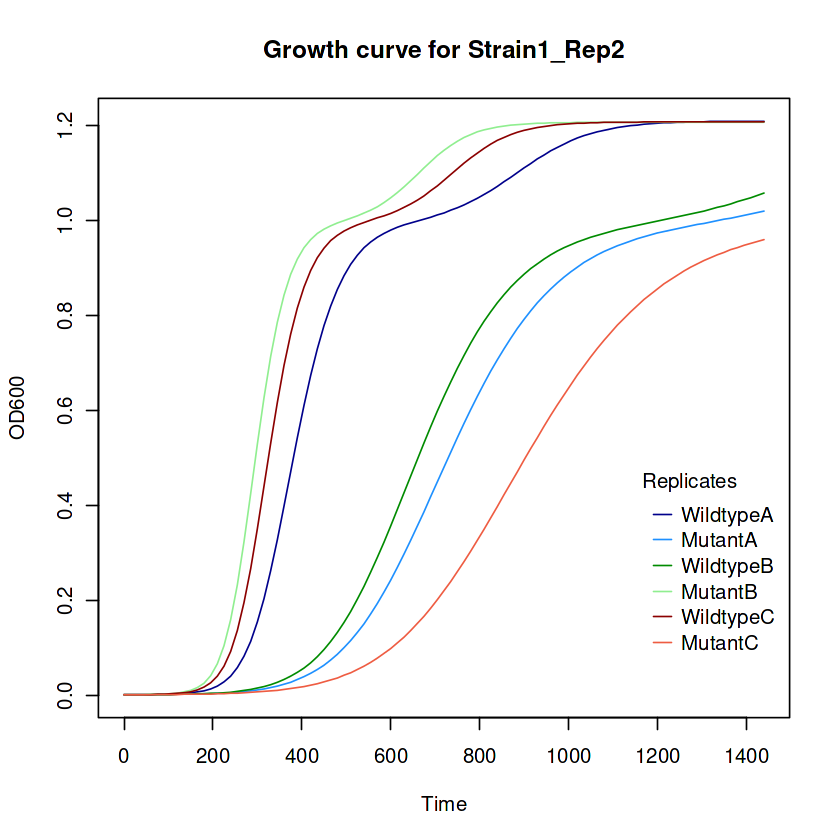

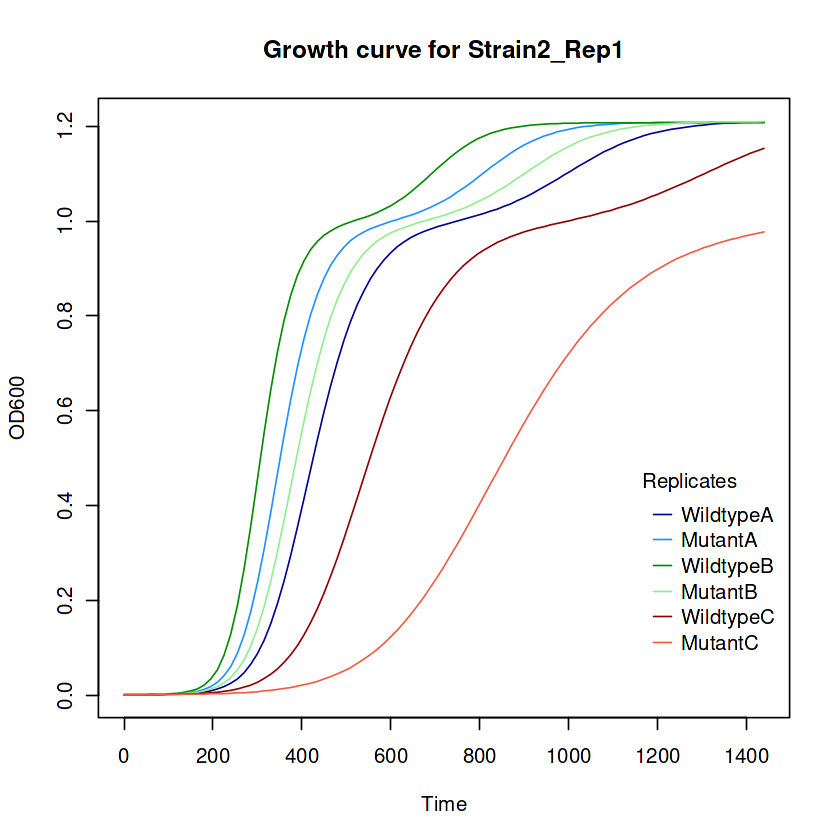

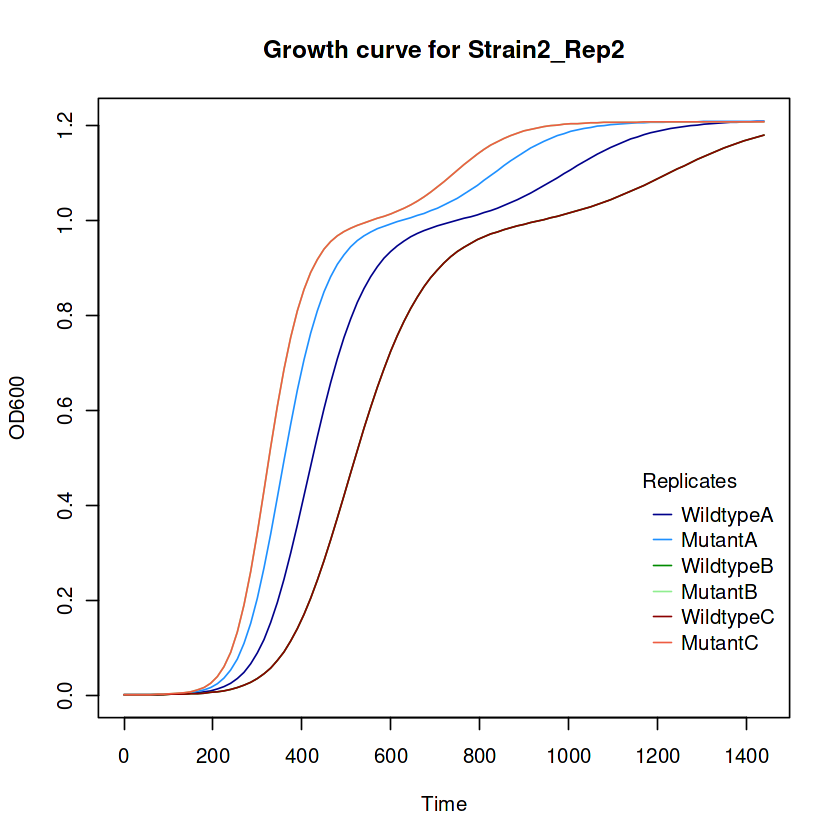

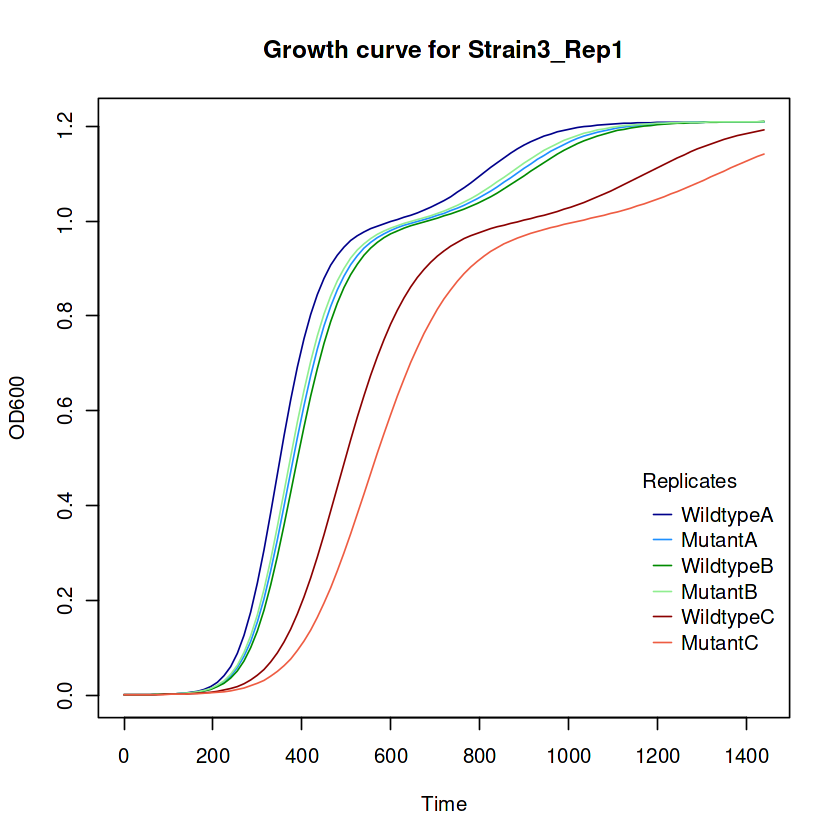

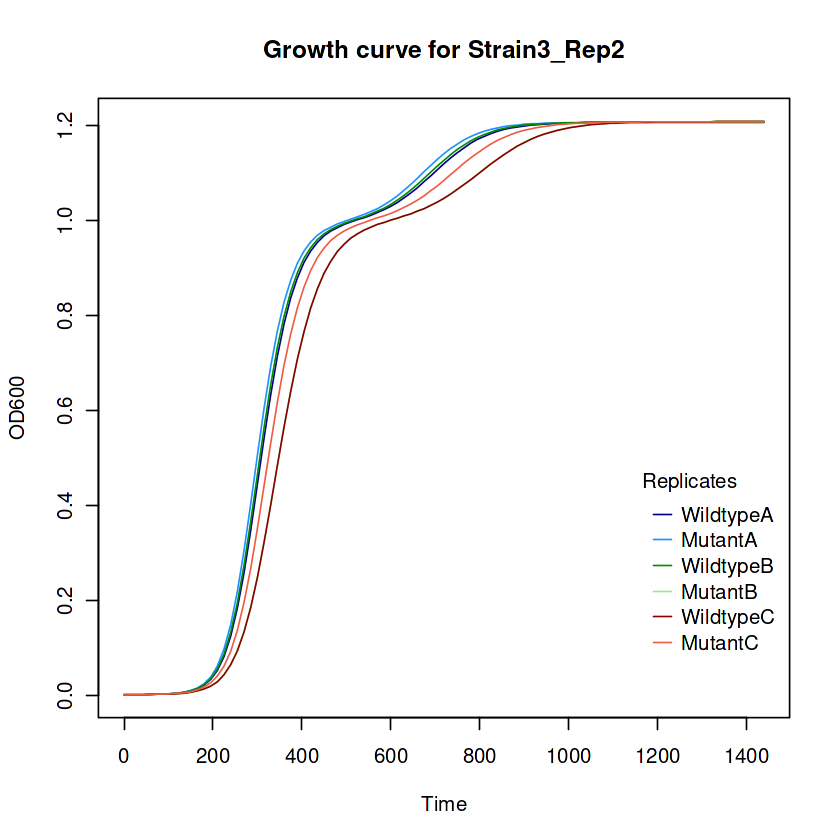

In [40]:
#For each strain, plot a growth curve of the the knock out (-) an knock in (+) strain overlaid on top of each other*

#I'll write a function that plots the graph for reproducibility
line_plot <- function(time, wildA, mutantA, wildB, mutantB,wildC, mutantC, title){
    #Create an empty plot with proper axis labels and title
    ## using 'n' in type ensures no plot is shown
    plot(time,wildA, type = "n", xlab = "Time", ylab = "OD600",
     main = paste("Growth curve for",title),
     ylim = range(c(wildA, mutantA, wildB, mutantB, wildC, mutantC)))  # Ensure all lines fit
    #plot lines
    lines(time, wildA, type = "l", col = "blue4")
    lines(time, mutantA, type = "l", col = "dodgerblue")
    lines(time, wildB, type = "l", col = "green4")
    lines(time, mutantB, type = "l", col = "lightgreen")
    lines(time, wildC, type = "l", col = "red4")
    lines(time, mutantC, type = "l", col = "tomato2")
    #Add legend
    legend("bottomright", legend = c("WildtypeA", "MutantA","WildtypeB", "MutantB","WildtypeC", "MutantC"),
       col = c("blue4", "dodgerblue","green4","lightgreen","red4","tomato2"), title = "Replicates",
       lty = 1, box.lty = 0, inset = .08)
}
# Using the function
line_plot(data$time, data$A1, data$A2, data$B1, data$B2,data$C1, data$C2, title="Strain1_Rep1")
line_plot(data$time, data$A3, data$A4, data$B3, data$B4,data$C3, data$C4, title="Strain1_Rep2")
line_plot(data$time, data$A5, data$A6, data$B5, data$B6,data$C5, data$C6, title="Strain2_Rep1")
line_plot(data$time, data$A7, data$A8, data$B7, data$B8,data$C7, data$C8, title="Strain2_Rep2")
line_plot(data$time, data$A9, data$A10, data$B9, data$B10,data$C9, data$C10, title="Strain3_Rep1")
line_plot(data$time, data$A11, data$A12, data$B11, data$B12,data$C11, data$C12, title="Strain3_Rep2")

In [4]:
#Using your function from last stage, determine the time to reach the carrying capacity for each strain/mutant*

#_Answer_
#I'm going to modify the funtion from the last task such that the output will be a dataframe to be 
#used for visualization in subsequent questions.

# Function to determine time to reach carrying capacity
carrying_cap_time <- function(time, od_list){
    # Initialize vectors to store results
    max_times <- numeric(length(od_list))   # Max time for each OD
    od_max <- numeric(length(od_list))      # Max OD value

    # Loop through each OD vector and find max time and OD
    for (i in seq_along(od_list)) {
        od <- od_list[[i]]  # Get the current OD vector

        # Find index of maximum OD value
        index_max <- which.max(od)

        # Store corresponding time and OD value
        max_times[i] <- time[index_max]
        od_max[i] <- max(od)
    }

    # Separate odd and even indices
    max_times_even <- max_times[seq(2, length(max_times), by = 2)]
    max_times_odd <- max_times[seq(1, length(max_times), by = 2)]
    od_max_even <- od_max[seq(2, length(od_max), by = 2)]
    od_max_odd <- od_max[seq(1, length(od_max), by = 2)]

    # Create dataframe
    final_result <- data.frame(
        Wildtype_time = max_times_odd,
        Wildtype_od = od_max_odd,
        Mutant_time = max_times_even,
        Mutant_od = od_max_even
    )

    return(final_result)
}

  Wildtype_time Wildtype_od Mutant_time Mutant_od
1          1035       1.207        1440     1.153
2          1440       0.980        1440     1.210
3          1440       0.960        1410     1.209
4          1320       1.209        1440     1.020
5          1440       1.058        1020     1.207
6          1170       1.208        1440     0.960


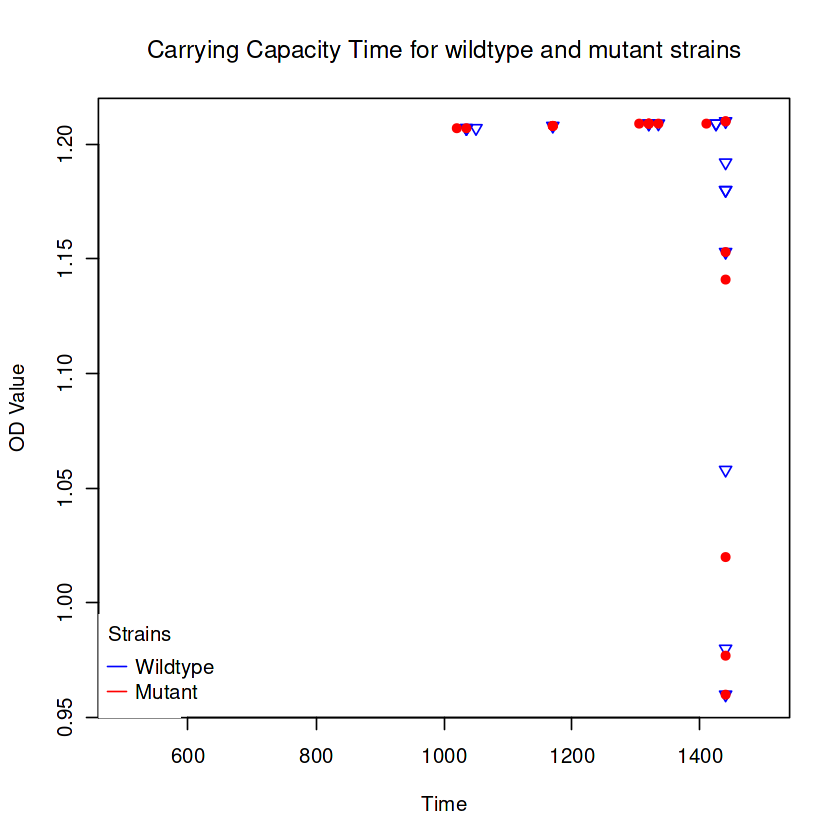

In [39]:
#Generate a scatter plot of the time it takes to reach carrying capacity for the knock out and the knock in strains*

#_Answer_
#Using the function in (ii) above

# Create list of OD vectors
od_list <- list(
    data$A1, data$A2, data$B1, data$B2, data$C1, data$C2,
    data$A3, data$A4, data$B3, data$B4, data$C3, data$C4,
    data$A5, data$A6, data$B5, data$B6, data$C5, data$C6,
    data$A7, data$A8, data$B7, data$B8, data$C7, data$C8,
    data$A9, data$A10, data$B9, data$B10, data$C9, data$C10,
    data$A11, data$A12, data$B11, data$B12, data$C11, data$C12
)
# Run function
df <- carrying_cap_time(data$time, od_list)

# Display first few rows
print(head(df))

# Plot result
plot(df$Wildtype_time, df$Wildtype_od, col = "blue", pch = 6,
     xlab = "Time", ylab = "OD Value", main = "Carrying Capacity Time for wildtype and mutant strains",
     font.main = 10,ylim = range(c(df$Wildtype_od, df$Mutant_od)), xlim = c(500,1500))
points(df$Mutant_time, df$Mutant_od, col = "red", pch = 16)
legend("bottomleft",title = "Strains", legend = c("Wildtype", "Mutant"), col = c("blue", "red"), lty = 1, box.lty = 0)


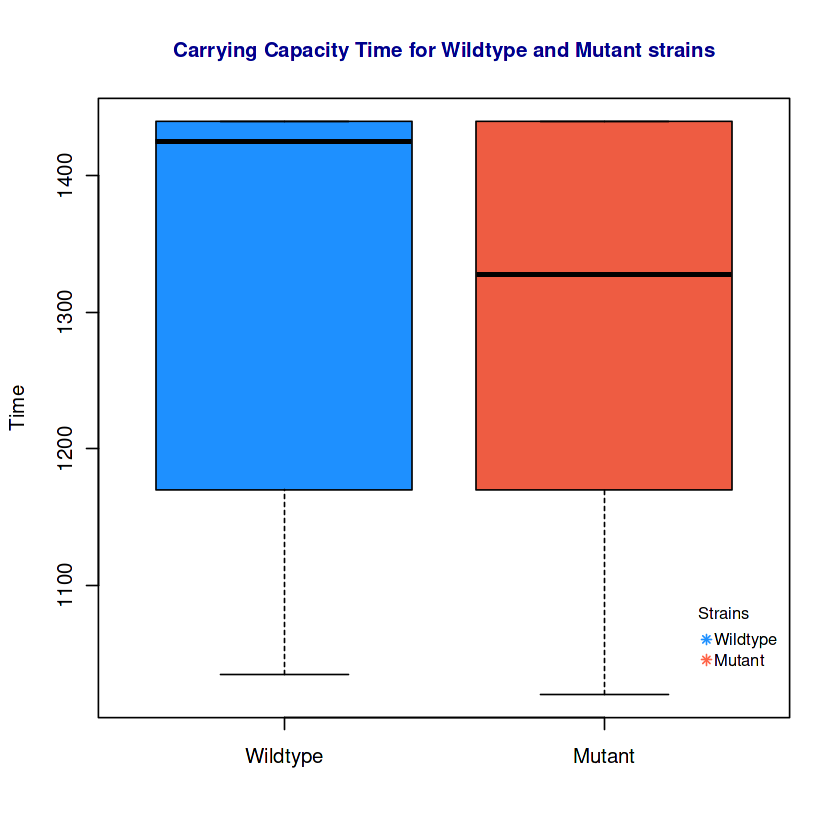

In [44]:
#Generate a box plot of the time it takes to reach carrying capacity for the knock out and the knock in strains*

#_Answer_
boxplot(df$Wildtype_time, df$Mutant_time,
        names = c("Wildtype", "Mutant"), #labels for x-axis
        col = c("dodgerblue", "tomato2"),
        main = "Carrying Capacity Time for Wildtype and Mutant strains",
        cex.main = 1, #fontsize for main title 
        col.main = "blue4", ylab = "Time")
legend("bottomright", legend = c("Wildtype", "Mutant"), col = c("dodgerblue", "tomato"), 
       title = "Strains", pch = 8, box.lty = 0, cex = 0.8, inset = .06)

*Is there a statistical difference in the time it takes the knock out strains to reach their maximum carrying capacity compared to the knock in strains*

_Answer_:
Yes.

*What do you see? Explain your observations as comments in your code*

_Answer_:
The boxplot shows that the maximum carrying capacity time for wildtype strains is left-skewed, indicating that some wildtype strains reached 
carrying capacity much later than others. Both boxplots are relatively tall, suggesting a high degree of variability in the time it takes for different 
strains to reach carrying capacity.
The median carrying capacity time for Wildtype strains is slightly above 1400, while for Mutant strains, it is slightly above 1300. 
This suggests that, on average, Wildtype strains took a longer time to reach carrying capacity compared to Mutant strains. The spread of values further 
implies that the growth dynamics of the strains vary, with some wildtype strains experiencing delayed growth compared to mutants.